In [1]:
# Import necessary libraries
## Exploratory Data Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)

##Modelling
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction import DictVectorizer

##Evaluation
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn.model_selection import KFold

In [2]:
df = pd.read_csv('chapter-02-car-price_data.csv')
df.shape

(11914, 16)

In [3]:
df.head().T

,0,1,2,3,4
Make,BMW,BMW,BMW,BMW,BMW
Model,1 Series M,1 Series,1 Series,1 Series,1 Series
Year,2011,2011,2011,2011,2011
Engine Fuel Type,premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required)
Engine HP,335.0,300.0,300.0,230.0,230.0
Engine Cylinders,6.0,6.0,6.0,6.0,6.0
Transmission Type,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL
Driven_Wheels,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive
Number of Doors,2.0,2.0,2.0,2.0,2.0
Market Category,"Factory Tuner,Luxury,High-Performance","Luxury,Performance","Luxury,High-Performance","Luxury,Performance",Luxury


#### Instruction
For the rest of the homework, you'll need to use only these columns:

- Make,
- Model,
- Year,
- Engine HP,
- Engine Cylinders,
- Transmission Type,
- Vehicle Style,
- highway MPG,
- city mpg
- MSRP

In [4]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [5]:
features = ['Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders', 'Transmission Type',
            'Vehicle Style', 'highway MPG','city mpg', 'MSRP']

# Create a new DataFrame with required features
data = df[features]

In [6]:
data.head().T

,0,1,2,3,4
Make,BMW,BMW,BMW,BMW,BMW
Model,1 Series M,1 Series,1 Series,1 Series,1 Series
Year,2011,2011,2011,2011,2011
Engine HP,335.0,300.0,300.0,230.0,230.0
Engine Cylinders,6.0,6.0,6.0,6.0,6.0
Transmission Type,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL
Vehicle Style,Coupe,Convertible,Coupe,Coupe,Convertible
highway MPG,26,28,28,28,28
city mpg,19,19,20,18,18
MSRP,46135,40650,36350,29450,34500


## Data preparation
- Keep only the columns above
- Lowercase the column names and replace spaces with underscores
- Fill the missing values with 0
- Make the price binary (1 if above the average, 0 otherwise) - this will be our target variable above_average
- Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use train_test_split function for that with random_state=1

In [7]:
data.columns

Index(['Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders',
       'Transmission Type', 'Vehicle Style', 'highway MPG', 'city mpg',
       'MSRP'],
      dtype='object')

In [8]:
data.columns = data.columns.str.replace(' ', '_').str.lower()
data.columns

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg',
       'msrp'],
      dtype='object')

In [9]:
data.isna().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [10]:
data = data.copy()

In [11]:
data['engine_hp'].fillna(0, inplace=True)

In [12]:
data['engine_cylinders'].fillna(0, inplace=True)

In [13]:
data.isna().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [14]:
data.rename(columns={'msrp': 'price'}, inplace=True)

In [15]:
data.price

0        46135
1        40650
2        36350
3        29450
4        34500
         ...  
11909    46120
11910    56670
11911    50620
11912    50920
11913    28995
Name: price, Length: 11914, dtype: int64

In [16]:
# Make price binary (1 if above the average, 0 otherwise)
mean_price = data.price.mean()

# Target variable will be 'above_average'
data['above_average'] = (data['price'] > mean_price).astype(int)

In [17]:
data['above_average']

0        1
1        1
2        0
3        0
4        0
        ..
11909    1
11910    1
11911    1
11912    1
11913    0
Name: above_average, Length: 11914, dtype: int32

In [18]:
data.drop('price', axis=1, inplace=True)

In [19]:
# Split df into df_full_train (80%) and df_test (20%)
df_full_train, df_test = train_test_split(data, test_size=0.2, random_state=1)

# Further split df_full_train into df_train (60%) and df_val (20%)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)


In [20]:
len(df_train), len(df_val), len(df_test)

(7148, 2383, 2383)

In [21]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [22]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

## Question 1: ROC AUC feature importance
- ROC AUC could also be used to evaluate feature importance of numerical variables.

Let's do that

- For each numerical variable, use it as score and compute AUC with the above_average variable
- Use the training dataset for that
- If your AUC is < 0.5, invert this variable by putting "-" in front (e.g. -df_train['engine_hp'])

- AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

- Which numerical variable (among the following 4) has the highest AUC?

  - engine_hp
  - engine_cylinders
  - highway_mpg
  - city_mpg

In [23]:
# List of numerical variables
num = data.select_dtypes(include=['number']).columns.tolist()

num

['year',
 'engine_hp',
 'engine_cylinders',
 'highway_mpg',
 'city_mpg',
 'above_average']

In [24]:
# Create an empty DataFrame to store AUC scores
auc_scores = []

# Iterate through numerical variables
for num_var in df_train.select_dtypes(include=['number']):
    # Compute the AUC for the current numerical variable
    auc = roc_auc_score(y_train, df_train[num_var])
    
    # Check if AUC is less than 0.5
    if auc < 0.5:
        auc_scores.append((-auc, '-' + num_var))
    else:
        auc_scores.append((auc, num_var))

# Sort
auc_scores.sort(reverse=True)

# Print the variable names and AUC scores
for auc, var_name in auc_scores:
    print(f'{var_name}: {auc}')


engine_hp: 0.9171031265539011
engine_cylinders: 0.766116490165669
year: 0.687551492804683
-city_mpg: -0.3265755356754767
-highway_mpg: -0.3669412128227987


##### Answer = engine_hp

## Question 2: Training the model
- Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:
'LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)'
- What's the AUC of this model on the validation dataset? (round to 3 digits)

In [25]:
cate = data.select_dtypes(include=['object', 'category']).columns.tolist()
cate

['make', 'model', 'transmission_type', 'vehicle_style']

In [26]:
nume = df_train.select_dtypes(include=['number']).columns.tolist()
nume

['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']

In [27]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[cate + nume].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[cate + nume].to_dict(orient='records')
X_val = dv.transform(val_dict)

#### Logistic regression

In [28]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [29]:
y_pred = model.predict(X_val)

In [30]:
y_pred_prob = model.predict_proba(X_val)[:, 1]

In [31]:
auc = roc_auc_score(y_val, y_pred_prob)

round(auc, 3)

0.98

##### Answer = 0.98

# Question 3: Precision and Recall
Now let's compute precision and recall for our model.

- Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
- For each threshold, compute precision and recall
- Plot them

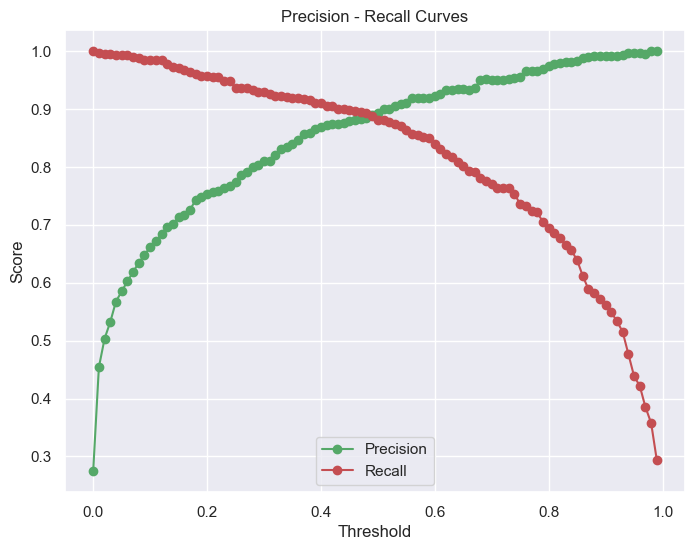

In [32]:
thresholds = np.arange(0.0, 1.0, 0.01)

precision_scores = []
recall_scores = []

# Calculate precision and recall for each threshold
for threshold in thresholds:
    y_pred_threshold = (y_pred_prob >= threshold).astype(int)
    
    precision = precision_score(y_val, y_pred_threshold)
    recall = recall_score(y_val, y_pred_threshold)
    
    precision_scores.append(precision)
    recall_scores.append(recall)

# plot
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision_scores, marker='o', linestyle='-', color='g', label='Precision')
plt.plot(thresholds, recall_scores, marker='o', linestyle='-', color='r', label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision - Recall Curves')
plt.legend()
plt.grid(True)
plt.show()


##### Answer = The threshold precision and recall curves intersect at 0.48

##  Question 4: F1 score
Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

- Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

- At which threshold F1 is maximal?

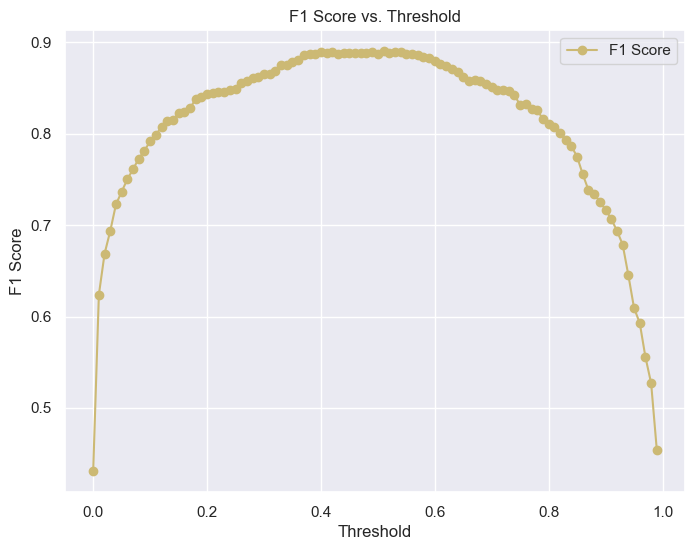

In [33]:
thresholds = np.arange(0.0, 1.0, 0.01)

f1_scores = []

# Calculate F1-score for each threshold
for threshold in thresholds:
    y_pred_threshold = (y_pred_prob >= threshold).astype(int)
    
    precision = precision_score(y_val, y_pred_threshold)
    recall = recall_score(y_val, y_pred_threshold)
    
    f1 = 2 * (precision * recall) / (precision + recall)
    
    f1_scores.append(f1)

# plot
plt.figure(figsize=(8, 6))
plt.plot(thresholds, f1_scores, marker='o', linestyle='-', color='y', label='F1 Score')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()


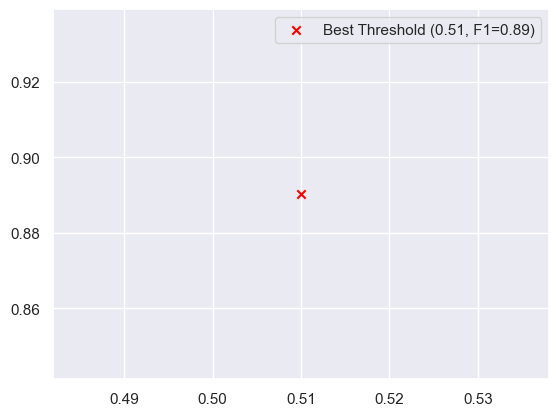

In [34]:

# Find the threshold at which F1 is maximal
best_threshold_index = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_index]
max_f1_score = f1_scores[best_threshold_index]



# Add a marker for the best threshold
plt.scatter(best_threshold, max_f1_score, color='red', marker='x', label=f'Best Threshold ({best_threshold:.2f}, F1={max_f1_score:.2f})')
plt.legend();

## Question 5: 5-Fold CV
Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds: KFold(n_splits=5, shuffle=True, random_state=1)
- Iterate over different folds of df_full_train
- Split the data into train and validation
- Train the model on train with these parameters: LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
- Use AUC to evaluate the model on validation
- How large is standard devidation of the scores across different folds?

In [35]:
# Step 1: Define the KFold with 5 splits, shuffle, and random_state
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Step 2: Iterate over different folds of df_full_train
for train_index, val_index in kf.split(df_full_train):
    
    # Step 3: Split the data into train and validation using fold indices
    df_train_fold, df_val_fold = df_full_train.iloc[train_index], df_full_train.iloc[val_index]
    
    # Step 4: Extract features and target variables from the train and validation data
    X_train_fold, y_train_fold = df_train_fold.drop(columns=['above_average']), df_train_fold['above_average']
    X_val_fold, y_val_fold = df_val_fold.drop(columns=['above_average']), df_val_fold['above_average']

    # Step 5: Feature engineering and data preprocessing
    dv = DictVectorizer(sparse=False)

    train_dict = df_train_fold[cate + nume].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    val_dict = df_val_fold[cate + nume].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    # Step 6: Train the model on train data with specified parameters
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train, y_train_fold)
    
    # Step 7: Predict probabilities on the validation data
    y_val_probabilities = model.predict_proba(X_val)[:, 1]
    
    # Step 8: Calculate AUC score for the validation data
    auc_score = roc_auc_score(y_val_fold, y_val_probabilities)
    
    # Step 9: Print the AUC score for this fold
    print(f'AUC for Fold: {auc_score:.3f}')


AUC for Fold: 0.978
AUC for Fold: 0.980
AUC for Fold: 0.983
AUC for Fold: 0.977
AUC for Fold: 0.978


In [36]:
auc_scores = [0.978, 0.980, 0.983, 0.977, 0.978]

std_deviation = np.std(auc_scores)
print(f'Standard Deviation of AUC Scores: {std_deviation:.3f}')


Standard Deviation of AUC Scores: 0.002


## Question 6: Hyperparemeter Tuning
- Now let's use 5-Fold cross-validation to find the best parameter C
- Iterate over the following C values: [0.01, 0.1, 0.5, 10]
- Initialize KFold with the same parameters as previously
- Use these parametes for the model: LogisticRegression(solver='liblinear', C=C, max_iter=1000)
- Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

In [37]:
C_values = [0.01, 0.1, 0.5, 10]

# Initialize lists to store mean and standard deviation scores
mean_scores = []
std_scores = []

kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Iterate over the C values
for C in C_values:
    # Initialize lists to store AUC scores for each fold
    auc_scores = []
    
    # Iterate over different folds of df_full_train
    for train_index, val_index in kf.split(df_full_train):
        # Split the data into train and validation using fold indices
        df_train_fold, df_val_fold = df_full_train.iloc[train_index], df_full_train.iloc[val_index]

        # Extract features and target variables from the train and validation data
        X_train_fold, y_train_fold = df_train_fold.drop(columns=['above_average']), df_train_fold['above_average']
        X_val_fold, y_val_fold = df_val_fold.drop(columns=['above_average']), df_val_fold['above_average']

        # Feature engineering and data preprocessing (same as before)
        dv = DictVectorizer(sparse=False)
        train_dict = df_train_fold[cate + nume].to_dict(orient='records')
        X_train = dv.fit_transform(train_dict)
        val_dict = df_val_fold[cate + nume].to_dict(orient='records')
        X_val = dv.transform(val_dict)

        # Train the model on train data with the current C value
        model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
        model.fit(X_train, y_train_fold)

        # Predict probabilities on the validation data
        y_val_probabilities = model.predict_proba(X_val)[:, 1]

        # Calculate AUC score for the validation data and store it
        auc_score = roc_auc_score(y_val_fold, y_val_probabilities)
        auc_scores.append(auc_score)

    # Calculate and store the mean and standard deviation of AUC scores for this C value
    mean_auc = np.mean(auc_scores)
    std_auc = np.std(auc_scores)
    
    mean_scores.append(round(mean_auc, 3))
    std_scores.append(round(std_auc, 3))

# Print the mean and standard deviation scores for each C value
for i, C in enumerate(C_values):
    print(f'C={C}: Mean AUC = {mean_scores[i]}, Std = {std_scores[i]}')


C=0.01: Mean AUC = 0.952, Std = 0.002
C=0.1: Mean AUC = 0.972, Std = 0.002
C=0.5: Mean AUC = 0.978, Std = 0.003
C=10: Mean AUC = 0.984, Std = 0.003
